# Task 1 - Prediction using Supervised ML

# Presented By: Mubeen Afshan Khan R.

# Goal: Predict the percentage of an student based on the no. of study hours.

Importing all the necessary libraries.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

Loading the dataset

In [14]:
df = pd.read_csv('http://bit.ly/w-data')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Here there are two columns in the dataset - Hours and Scores.

Now to check the number of rows

In [15]:
df.shape

(25, 2)

Hence there are 25 rows and 2 columns.

In [25]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


This is done to check for all the null values in the dataset.
The null values present in the may affect the performance of the model hence this is a mandatory step.

In [26]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Since, There are no NaN values present in our dataset we can proceed further.

# Data Visualization

Plotting the data and cheking for any kind of relationship manually.

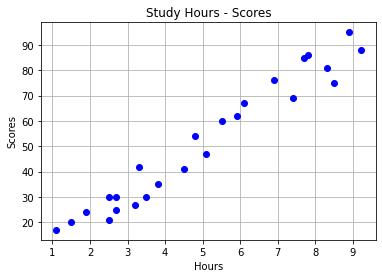

In [29]:
plt.figure()
plt.plot(df['Hours'].values, df['Scores'].values, 'o', color='blue')
plt.grid(True)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Study Hours - Scores')
plt.show()

By looking at the graph we can say that our data is highly correlated so, we can make the use of linear regression. 

# Prediction

Here we divide our dataset into dependent and independent variables. 'y' is our target (or dependent) variable and 'X' is our independent variable.

In [31]:
X = df.iloc[:, :1].values
y = df.iloc[:,-1:].values

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Setting the random_state is important as it keeps the results constant. Default is set to 'None' and the result varies with each run.

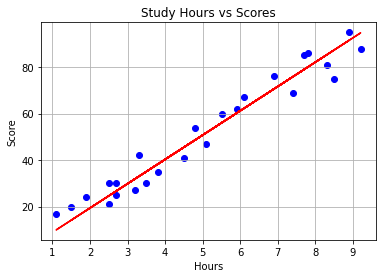

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)   # Training

line = model.coef_*X+model.intercept_  # Equation of line --> y = mx + c

# Plotting the data with the regression line

plt.scatter(X, y, color = 'blue')
plt.plot(X, line, color = 'red')
plt.grid(True)
plt.xlabel('Hours')
plt.ylabel('Score')
plt.title('Study Hours vs Scores')
plt.show()

In [39]:
regr_predict = model.predict(X_test)

Now,Predicting the score for 9.25 hours of studying -

In [40]:
hours =  [[9.25]]
result = model.predict(hours)
print("No. of Hours = {}".format(hours))
print("Score Predicted = {}".format(result[0]))

No. of Hours = [[9.25]]
Score Predicted = [95.22829438]


# Metrics

Evaluating the performance of the model

In [41]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, regr_predict))

Mean Absolute Error: 7.882398086270432
